In [81]:
import random
import pandas  as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import copy


In [82]:
class CqkProblem:
    def __init__(self, r, n, d, a, b, up):
        self.n = n
        self.r = r
        self.d = list(d)
        self.a = list(a)
        self.b = list(b)
        self.up = list(up)

In [90]:

def generate_cqk_problem(n):
    d = []
    low = []
    up = []
    b = []
    a = []
    temp = 0
    lb = 0.0
    ub = 0.0
    lower = 10
    upper = 25
    r = 0

    for i in range(n):
        
        b.append(10 + 14*random.random())
        up.append(1 + 14*random.random())
        
        ub = ub + b[i]*up[i];
        
        #Uncorrelated
        d.append(random.randint(10,25))
        a.append(random.randint(10,25))
        
    r = ub*0.7;
    
    return CqkProblem( r, n, d, a, b, up)
    

In [91]:

def initial_lambda(p, lamb):
    s0=0.0
    q0=0.0
    slopes = []
    for i in range(p.n):
        slopes.append((p.b[i]/p.d[i])*p.b[i])
        s0 = s0 + (p.a[i] * p.b[i]) / p.d[i]
        q0 = q0 + (p.b[i] * p.b[i]) / p.d[i]
    lamb = (p.r-s0)/q0
    return lamb, slopes

In [92]:
def phi_lambda(p,lamb,phi,deriv,slopes,r):
    deriv = 0.0
    phi = r * -1
    x = []
    
    for i in range(p.n):
        
        x.append( (p.b[i] * lamb + p.a[i])/p.d[i])

        if x[i] > p.up[i]:
            x[i] = p.up[i]
        else:
            deriv = deriv + slopes[i];
        phi = phi + p.b[i] * x[i];
    return deriv, phi, x

In [93]:
MAX_IT = 20
INFINITO_NEGATIVO = -999999999;
INFINITO_POSITIVO = 999999999;
def newton(p):
    phi = 0
    lamb = 0
    lambs = []
    alfa = INFINITO_NEGATIVO;
    beta = INFINITO_POSITIVO;
    phi_alfa = 0.0;
    phi_beta = 0.0;
    deriv = 0
    x = []
    r = p.r
    
    lamb, slopes = initial_lambda(p,lamb)
    lambs.append(lamb)
    deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)
    it = 1
    while phi != 0.0 and it <= MAX_IT:
        if phi > 0:
#             print("positivo")
            beta = lamb
            lambda_n = 0.0
            if deriv > 0.0:
                
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                if lambda_n > alfa:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_beta = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
#             if deriv == 0.0:
#                 lamb = breakpoint_to_the_left(p,lamb);
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
                
        else:
#             print("negativo")
            alfa = lamb;
            lambda_n = 0.0;

            if deriv > 0.0:
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                
                if lambda_n < beta:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_alfa = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
            if deriv == 0.0:
                print("aqui 2")
#                 lamb = breakpoint_to_the_right(p,lamb)
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
        
        
        deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)
        lambs.append(lamb)
        it = it + 1
        
    if phi == 0.0:
        return it, x, slopes,lambs
    elif alfa == beta:
        return -1
    else:
        return -2
    

In [142]:
%%time
n = 500
p = generate_cqk_problem(n)
it, x, slopes, lambs = newton(p)
it

CPU times: user 11.1 ms, sys: 149 µs, total: 11.2 ms
Wall time: 12.3 ms


5

In [143]:
lambs

[4.039890479459153,
 5.340489384572055,
 5.52283759802922,
 5.52489868908212,
 5.524904229050363]

In [123]:
def median(a,b,c):
    if a > b:
        if a < c:
            return a
        elif b > c:
            return b
        else:
            return c
    else:
        if a > c:
            return a
        elif b < c:
            return b
        else:
            return c

In [124]:
# soma = 0
# for i in range(n):
#     soma = soma + p.b[i] * median(p.low[i], (p.b[i] *(8.852533755968373) + p.a[i]) / p.d[i], p.up[i])
# soma
# soma_b = 0
# for i in range(n):
#     soma = soma + p.b[i] * median(p.low[i], (p.b[i] *(8.852533755968373) + p.a[i]) / p.d[i], p.up[i])

In [118]:
total = 0
for i in range(n):
    total += x[i] * p.b[i]

print(total, p.r)

47559.83373905753 47559.833739057576


In [125]:
t = np.arange(0, 15, 0.5).tolist()
y = copy.deepcopy(t)
for j in range(len(t)):
    lamb = t[j]
    
    soma = 0
    
    for i in range(n):
        soma = soma + p.b[i] * min((p.b[i] *lamb + p.a[i]) / p.d[i], p.up[i])
    
    y[j] = soma

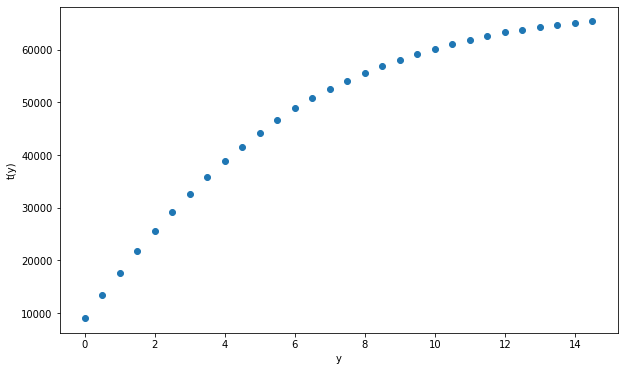

In [126]:
data = {'t': t,
        'y': y,
       }

df = pd.DataFrame (data, columns = ['t','y'])

X = DataFrame(data,columns=['t'])
y = DataFrame(data,columns=['y'])

plt.figure(figsize=(10,6))
plt.scatter(X,y)

plt.xlabel('y')
plt.ylabel('t(y)')
plt.show()

In [127]:
t = np.arange(0, 15, 0.5).tolist()
y = copy.deepcopy(t)
for j in range(len(t)):
    lamb = t[j]
    
    soma = 0
    
    for i in range(n):
        soma = soma + p.b[i] * (p.b[i] *lamb + p.a[i]) / p.d[i]
    
    y[j] = soma

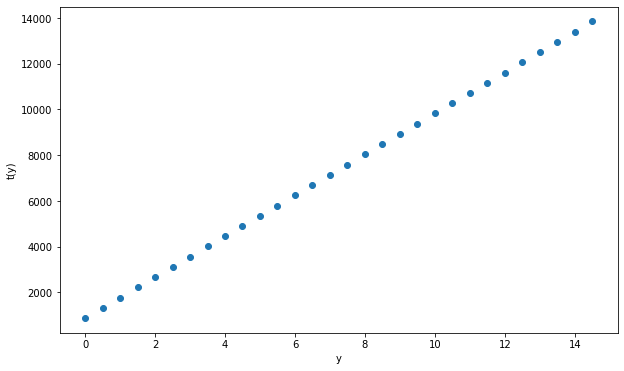

In [38]:
data = {'t': t,
        'y': y,
       }

df = pd.DataFrame (data, columns = ['t','y'])

X = DataFrame(data,columns=['t'])
y = DataFrame(data,columns=['y'])

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('y')
plt.ylabel('t(y)')
plt.show()

In [184]:
%%time
n = 10000
p = generate_cqk_problem(n)
it, x, slopes, lambs = newton(p)
it, lambs

CPU times: user 111 ms, sys: 4.31 ms, total: 115 ms
Wall time: 116 ms


(5,
 [4.149142369188863,
  5.446943916059633,
  5.59229486167964,
  5.593998565651403,
  5.5939987644682825])

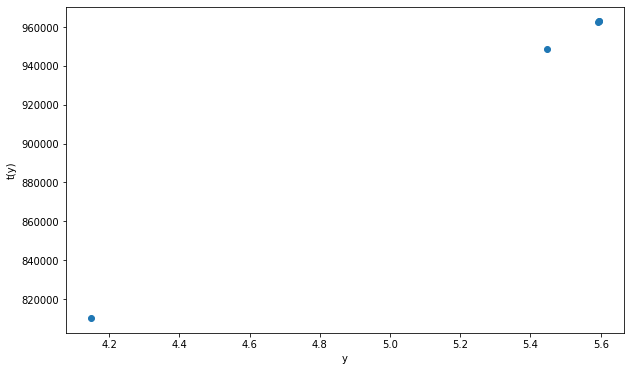

In [185]:


plt.figure(figsize=(10,6))
sums = []
for j in range(len(lambs)):
    soma = 0
    for i in range(n):
        soma = soma + p.b[i] * min((p.b[i] *lambs[j] + p.a[i]) / p.d[i], p.up[i])
    sums.append(soma)

sums
plt.scatter(lambs, sums)
plt.xlabel('y')
plt.ylabel('t(y)')
plt.show()



In [177]:
lambs

[4.2610409441672505, 5.569070911004536, 5.7293929495308715, 5.731915181550447]

In [146]:
sums

[39155.0303970972,
 46141.37117113177,
 47006.27312462362,
 47015.87044307066,
 47015.89621123287]